# Load Capacitor Assistant  


In [6]:
import numpy as np
import matplotlib.pyplot as plt

#### Nominal $F_S$ Calculator
$f_L = f_S(1+\frac{C_1}{2(C_0+C_L)})$


$f_S = \frac{f_L}{1+\frac{C_1}{2(C_0+C_L)}}$

In [32]:
fs = 32755.2452844868        #250B
cm = 6.67597348377331e-15    #250B
c0 = 1.5194505369094e-12    #250B
cl_nominal = 7e-12           #Datasheet
c1c2 = 6e-12                 #Customer schematic
f_customer_board = 32766.24  #Measured frequency on-board

if fs == None:
    fl_nominal = 32768
    fs = fl_nominal / ( 1 + cm / ( 2 * ( c0 + cl_nominal ) ) )
print(f"fs = {fs}")

fs = 32755.2452844868


#### Calculation and Visualization

Ts = -45.99 ppm/pF
Fa = 32827.12Hz
Lm = 3536420.9 mH
Cm = 6.68 fF
C0 = 1.52 pF
Current added CL  = 3.0 pF
Current CL = 8.425000000000718 pF
Board Stray estimate = 5.43 pF
Recommended c1=c2= 3.15 pF


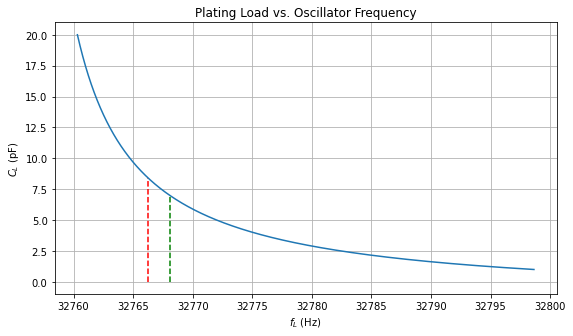

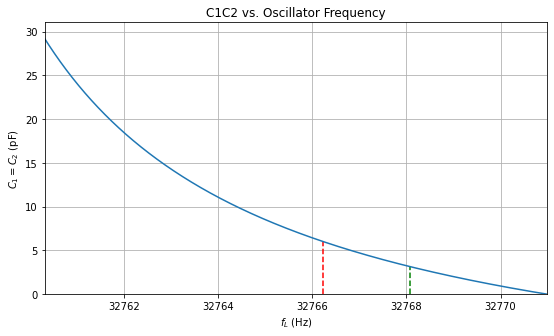

In [33]:
cl = np.arange(1e-12, 20e-12, 1e-15)
fl = fs * ( 1 + cm/( 2 * (c0 + cl) ) )
fa = fs * np.sqrt( 1 + cm/c0 )
lm = ( 1 / ( 2 * np.pi * fs ) )**2 / cm
ts = -( cm / ( 2 * ( c0 + cl_nominal )**2 ) )*1e-6


#Determines closest index to customer board and optimal fl
customer_fl_cl_index = np.abs(fl-f_customer_board).argmin()
optimal_fl_cl_index  = np.abs(cl-cl_nominal).argmin()

cl_current = cl[customer_fl_cl_index]
board_strays = cl_current - c1c2/2
c1c2_recommended = 2*(cl_nominal - board_strays)

#
# Plating Load vs. Oscillator Frequency
#
plt.figure(figsize=(9,5))
plt.title(f'Plating Load vs. Oscillator Frequency')
plt.ylabel('$C_L$ (pF)')
plt.xlabel('$f_L$ (Hz)')
plt.grid()
plt.plot(fl, cl*1e12)
plt.vlines(fl[customer_fl_cl_index], 0, cl[customer_fl_cl_index]*1e12, 
           linestyles='--', color='red', label='Customer Board')
plt.vlines(fl[optimal_fl_cl_index], 0, cl[optimal_fl_cl_index]*1e12, 
           linestyles='--', color='green', label='Optimal')
# plt.savefig("CL Freq Response.svg", bbox_inches='tight', pad_inches=0.3)

#
# C1C2 vs. Oscillator Frequency
#
c1c2_dist = 2*(cl - board_strays)

plt.figure(figsize=(9,5))
plt.title(f'C1C2 vs. Oscillator Frequency')
plt.ylabel('$C_1 = C_2$ (pF)')
plt.xlabel('$f_L$ (Hz)')
plt.grid()
plt.plot(fl, c1c2_dist*1e12)
plt.ticklabel_format(useOffset=False)
plt.ylim(bottom=0)
plt.xlim(left = fl[len(fl)-1], right=fl[np.argmin(np.abs(c1c2_dist))])
plt.vlines(fl[customer_fl_cl_index], 0, c1c2_dist[customer_fl_cl_index]*1e12, 
           linestyles='--', color='red', label='Customer Board')
plt.vlines(fl[optimal_fl_cl_index], 0, c1c2_dist[optimal_fl_cl_index]*1e12, 
           linestyles='--', color='green', label='Optimal')
plt.savefig("C1C2 vs Freq.svg", bbox_inches='tight', pad_inches=0.3)


# Text results outputed in-program
print(f"Ts = {round(ts, 2)} ppm/pF")
print(f"Fa = {round(fa, 2)}Hz")
print(f"Lm = {round(lm*1e3, 2)} mH")
print(f"Cm = {round(cm*1e15, 2)} fF")
print(f"C0 = {round(c0*1e12, 2)} pF")
print(f"Current c1=c2 = {c1c2*1e12} pF", file=open("output.txt", 'a'))
print(f"Current added CL  = {c1c2*1e12/2} pF")
print(f"Current CL = {cl_current*1e12} pF")
print(f"Board Stray estimate = {round(board_strays*1e12,2)} pF")
print(f"Recommended c1=c2= {round(c1c2_recommended*1e12, 2)} pF")

# Text results outputed to an output.txt file
print(f"Ts = {round(ts, 2)} ppm/pF", file=open("output.txt", 'w'))
print(f"Fa = {round(fa, 2)}Hz", file=open("output.txt", 'a'))
print(f"Lm = {round(lm*1e3, 2)} mH", file=open("output.txt", 'a'))
print(f"Cm = {round(cm*1e15, 2)} fF", file=open("output.txt", 'a'))
print(f"C0 = {round(c0*1e12, 2)} pF", file=open("output.txt", 'a'))
print(f"Current c1=c2 = {c1c2*1e12} pF", file=open("output.txt", 'a'))
print(f"Current added CL  = {c1c2*1e12/2} pF", file=open("output.txt", 'a'))
print(f"Current CL = {cl_current*1e12} pF", file=open("output.txt", 'a'))
print(f"Board Stray estimate = {round(board_strays*1e12,2)} pF", file=open("output.txt", 'a'))
print(f"Recommended c1=c2= {round(c1c2_recommended*1e12, 2)} pF", file=open("output.txt", 'a'))